# 3.0 Modeling 

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [91]:
df = pd.read_csv('../data/clean_data/reddit_content_clean.csv')
df.head()

,Unnamed: 0,title,author,selftext,media_only,num_comments,subreddit,created_utc,title_length,title_word_count,...,lemma_selftext,stemma_selftext,t_neg,t_neu,t_pos,t_compound,s_neg,s_neu,s_pos,s_compound
0,0,Is there anyway to Trade US options in UK,yoghin,I can't find any platforms that offer US optio...,False,0,0,1645974032,41,9,...,I can not find any platform that offer US opti...,I can not find any platform that offer US opti...,0.0,1.000,0.000,0.0000,0.000,0.876,0.124,0.1779
1,1,NVDA's short leg,listenless,I bought 240-200 Jan 2023 bear puts spread o...,False,0,0,1645971541,16,3,...,I bought 240-200 Jan 2023 bear put spread on N...,I bought 240-200 Jan 2023 bear put spread on N...,0.0,1.000,0.000,0.0000,0.094,0.816,0.090,-0.1830
2,2,Patrick Boyle breaks down tons of consequences...,professorfundamental,This video: \n\n[https://www.youtube.com/watch...,False,0,0,1645955748,152,25,...,This video : [ http : //www.youtube.com/watch ...,This video : [ http : //www.youtube.com/watch ...,0.0,0.923,0.077,0.2500,0.053,0.873,0.075,0.5122
3,3,Did a play paper trading on TOS. Made $900 now...,doyzoe,NaN,False,1,0,1645954258,125,26,...,NaN,NaN,0.0,0.783,0.217,0.6249,0.000,0.000,0.000,0.0000
4,4,Patrick Boyle breaks down tons of consequences...,professorfundamental,NaN,False,1,0,1645951913,152,25,...,NaN,NaN,0.0,0.923,0.077,0.2500,0.000,0.000,0.000,0.0000


**Find and Fill missing values**

In [92]:
df.isnull().sum()

Unnamed: 0               0
title                    0
author                   0
selftext               298
media_only               0
num_comments             0
subreddit                0
created_utc              0
title_length             0
title_word_count         0
selftext_length          0
selftext_word_count      0
no_cont_title            0
no_cont_selftext       298
tokenized_title          0
tokenized_selftext       0
lemma_title              0
stemma_title             0
lemma_selftext         298
stemma_selftext        298
t_neg                    0
t_neu                    0
t_pos                    0
t_compound               0
s_neg                    0
s_neu                    0
s_pos                    0
s_compound               0
dtype: int64

In [93]:
df.fillna({'selftext':'','no_cont_selftext':'','lemma_selftext':'','stemma_selftext':''}, inplace=True)

In [94]:
df.isnull().sum()

Unnamed: 0             0
title                  0
author                 0
selftext               0
media_only             0
num_comments           0
subreddit              0
created_utc            0
title_length           0
title_word_count       0
selftext_length        0
selftext_word_count    0
no_cont_title          0
no_cont_selftext       0
tokenized_title        0
tokenized_selftext     0
lemma_title            0
stemma_title           0
lemma_selftext         0
stemma_selftext        0
t_neg                  0
t_neu                  0
t_pos                  0
t_compound             0
s_neg                  0
s_neu                  0
s_pos                  0
s_compound             0
dtype: int64

**Model Data Setup**

In [95]:
# X = df['title']
X = df['lemma_title']
# X = df['stemma_title']

# X = df['selftext']
# X = df['lemma_selftext']
# X = df['stemma_selftext']

X.head()

0             Is there anyway to Trade US option in UK
1                                    NVDA 's short leg
2    Patrick Boyle break down ton of consequence of...
3    Did a play paper trading on TOS . Made $ 900 n...
4    Patrick Boyle break down ton of consequence of...
Name: lemma_title, dtype: object

In [96]:
y = df['subreddit']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: subreddit, dtype: int64

In [97]:
y.value_counts(normalize=True)   # baseline is 50.025% accurate

0    0.50025
1    0.49975
Name: subreddit, dtype: float64

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, stratify=y)

**3.1 Logistic Regression and Count Vectorizer**

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.827877017250974
{'lr__max_iter': 1000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}


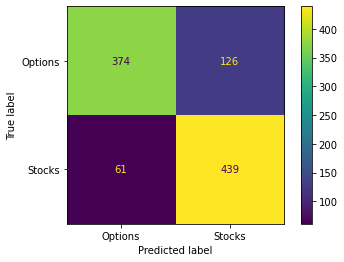

In [99]:
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('lr', LogisticRegression(random_state=42))
])

# Just trying to get a feel for the scores on train vs test data
# pipe.fit(X_train,y_train)
# pipe.score(X_train, y_train), pipe.score(X_test, y_test)
params = { 
            'vect__stop_words':[None,'english'],
            # 'lr__penalty':['l1', 'l2', 'elasticnet', 'none'],    #l2, Ridge, is default
            'lr__max_iter': [1000],
            'vect__ngram_range' : [(1,1),(1,2),(2,2)]
}


gs = GridSearchCV(    pipe,         # What is the model we want to fit?
                      param_grid = params,  # What is the dictionary of hyperparameters?
                      cv=5,           # What number of folds in CV will we use?
                      verbose=1)

gs.fit(X_train,y_train)
print(gs.best_score_)   # <- Crossval score
print(gs.best_params_)
plot_confusion_matrix(gs, X_test, y_test, display_labels=['Options','Stocks']);

# with help from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# and https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

**3.3 Random Forest and Count Vectorizer**

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8368953811908737
{'vect__ngram_range': (1, 2), 'vect__stop_words': None}


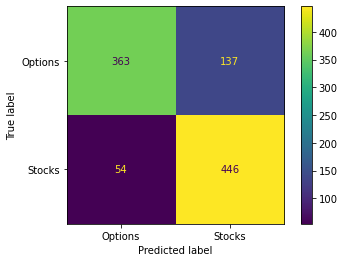

In [100]:
pipe2 = Pipeline([
    ('vect', CountVectorizer()),
    ('rf', RandomForestClassifier(random_state=42))
])
params2 = { 
            'vect__stop_words':[None,'english'],
            'vect__ngram_range' : [(1,1),(1,2),(2,2)]
}
gs2 = GridSearchCV(    pipe2,         # What is the model we want to fit?
                      param_grid = params2,  # What is the dictionary of hyperparameters?
                      cv=5,           # What number of folds in CV will we use?
                      verbose=1)

gs2.fit(X_train,y_train)
print(gs2.best_score_)   # <- Crossval score
print(gs2.best_params_)
plot_confusion_matrix(gs2, X_test, y_test, display_labels=['Options','Stocks']);

**3.4 K Neighbors and Count Vectorizer**

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.7374785754034503
{'vect__ngram_range': (1, 1), 'vect__stop_words': 'english'}


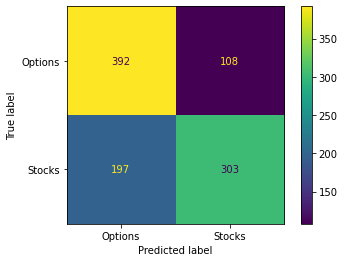

In [101]:
pipe3 = Pipeline([
    ('vect', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

params3 = {
     'vect__stop_words':[None,'english'],
     'vect__ngram_range' : [(1,1),(1,2),(2,2)]
}

gs3 = GridSearchCV(    pipe3,         # What is the model we want to fit?
                      param_grid = params3,  # What is the dictionary of hyperparameters?
                      cv=5,           # What number of folds in CV will we use?
                      verbose=1)

gs3.fit(X_train,y_train)
print(gs3.best_score_)   # <- Crossval score
print(gs3.best_params_)
plot_confusion_matrix(gs3, X_test, y_test, display_labels=['Options','Stocks']);

In [102]:
print(f"LogReg Score: {round(gs.best_score_,3)}")  
print(f"Random Forest Score: {round(gs2.best_score_,3)}") 
print(f"KNeighbors Score: {round(gs3.best_score_,3)}") 
print(f"\nLogReg Best Params: {gs.best_params_}")
print(f"Random Forest Best Params: {gs2.best_params_}")
print(f"KNeighbors Best Params: {gs3.best_params_}")

LogReg Score: 0.828
Random Forest Score: 0.837
KNeighbors Score: 0.737

LogReg Best Params: {'lr__max_iter': 1000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
Random Forest Best Params: {'vect__ngram_range': (1, 2), 'vect__stop_words': None}
KNeighbors Best Params: {'vect__ngram_range': (1, 1), 'vect__stop_words': 'english'}


# 3.1 Model Selection 

After running the models against the original titles, the lemmatized titles, and stemmed titles, it looks like the Random Forest model with the lemmatized titles gives us the best cross_val_score. The next step is to attempt to optimize the model by adjusting hyperparameters. At the bottom of this notebook, we have saved all of the tracking data from each of the different combinations of model/title/subtext.

**Scores based on Lemma Title**
<br> Random Forest Score: 0.835
<br> Random Forest Best Params: {'vect__ngram_range': (1, 1), 'vect__stop_words': None}
<br>
<br>
<br>You'll notice below that we also ran the selftext (post) content through all of the models.  The scores on the selftext data are all lower but 15% of the selftext data was null.  We believe that given more time, we could optimize around the selftext data.

# 3.2 Model Tuning 

In [103]:
X = df['lemma_title']
y = df['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, stratify=y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.8232136894824709
{'vect__stop_words': None, 'vect__ngram_range': (1, 2), 'rf__n_estimators': 800, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 4, 'rf__max_depth': 60, 'rf__bootstrap': False}


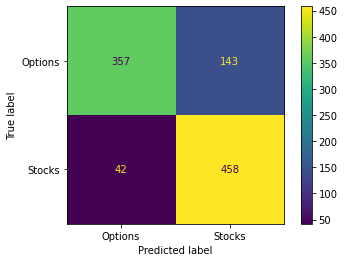

In [104]:
pipe4 = Pipeline([
    ('vect', CountVectorizer()),
    ('rf', RandomForestClassifier(random_state=42))
])
params4 = { 
            'vect__stop_words':[None,'english'],
            'vect__ngram_range' : [(1,1),(1,2),(2,2)],
            'rf__bootstrap': [True, False],
            'rf__min_samples_leaf': [1, 2, 4],
            'rf__min_samples_split': [2, 5, 10]   ,
            'rf__n_estimators':[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]    ,
            'rf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]   
    
}
gs4 = RandomizedSearchCV(    pipe4,         # What is the model we want to fit?
                      param_distributions = params4,  # What is the dictionary of hyperparameters?
                      cv=5,           # What number of folds in CV will we use?
                      verbose=1)
# When trying GridSearchCV, this was attempging more than 59,000 fits.  Decided to use RandomizedSearch instead.
gs4.fit(X_train,y_train)
print(gs4.best_score_)   # <- Crossval score
print(gs4.best_params_)
plot_confusion_matrix(gs4, X_test, y_test, display_labels=['Options','Stocks']);

#Tuning was done with a lot help from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# 3.3 Model Evaluation 

In [119]:
preds = gs4.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print("Accuracy: ", (tn + tp) / (tn + fp + fn + tp))
print('Misclassification Rate: ', (fp+fn)/(tp+fp+tn+fn))

print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))
print("Precision: ", tp / (tp + fp))

Accuracy:  0.815
Misclassification Rate:  0.185
Sensitivity:  0.916
Specificity:  0.714
Precision:  0.762063227953411


In [106]:
print(tn, fp, fn, tp)

357 143 42 458


[Text(0, 0.5, 'Options'), Text(0, 1.5, 'Stocks')]

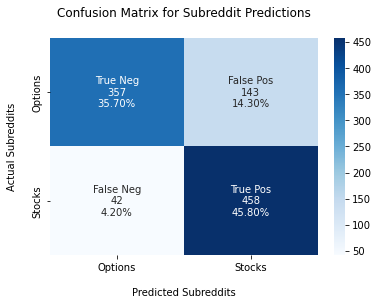

In [131]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix for Subreddit Predictions\n');
ax.set_xlabel('\nPredicted Subreddits')
ax.set_ylabel('Actual Subreddits\n');
ax.xaxis.set_ticklabels(['Options','Stocks'])
ax.yaxis.set_ticklabels(['Options','Stocks'])

# with help from https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

In [107]:
#which were misclassified
X_test[y_test != preds]

#this wasn't too helpful.  Going to build a new dataframe and do some more analytics on the misclassified titles if there is enough time

748                            Price data at 3:45 v 4pm ?
929                    Trading during such uncertain time
1248                   Mildly Educational Memes ( Day 1 )
489                                Podcast recommendation
860                     Fed Rate increase v Impact to Rho
                              ...                        
154           Do you recommend sticking to a few ticker ?
640                      What just happened with AFRM ? ?
50                                Free money at no cost !
821     The last time Americans liked their president ...
2707                       Quick Tax / wash sale question
Name: lemma_title, Length: 185, dtype: object

In [108]:
# New dataframe to hopefully understand some of the misclassifications
predictions = pd.DataFrame({
    'Title' : X_test, 
    'Actual_Reddit' : y_test, 
    'Predicted_Reddit' : gs.predict(X_test),
    'Prob_Options' : [i[0] for i in gs.predict_proba(X_test)],
    'Prob_Stocks' : [i[1] for i in gs.predict_proba(X_test)]})

predictions['Corr_Incorr'] = np.where(predictions['Actual_Reddit'] == predictions['Predicted_Reddit'], 'Correct', 'Incorrect')
predictions['Difference'] = np.abs(predictions['Prob_Options'] - predictions['Prob_Stocks'])

# with help from https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column

In [109]:
predictions.head()

,Title,Actual_Reddit,Predicted_Reddit,Prob_Options,Prob_Stocks,Corr_Incorr,Difference
748,Price data at 3:45 v 4pm ?,0,0,0.547205,0.452795,Correct,0.094410
252,I need help deciding my exit strategy for an S...,0,0,0.981710,0.018290,Correct,0.963420
1069,Goodmorning . What is the better option beginn...,0,0,0.972364,0.027636,Correct,0.944729
2886,What is the best ETF ?,1,1,0.174399,0.825601,Correct,0.651202
902,$ BITO put are being dumped on the bid and cal...,0,0,0.924253,0.075747,Correct,0.848506


**Previous Model Scores**
<br>Below we tracked each of the testing score as we tried different models and data including the selftext (post) content through all of the models.  The scores on the selftext data are all lower but 15% of the selftext data was null.  We believe that given more time, we could optimize around the selftext data.  It should be noted that these scores changed each time the model ran until we finally set a RandomState for each model. 

In [110]:
# Scores based on Original Title
# LogReg Score: 0.82
# Random Forest Score: 0.829
# KNeighbors Score: 0.751

# LogReg Best Params: {'lr__max_iter': 1000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
# Random Forest Best Params: {'vect__ngram_range': (1, 1), 'vect__stop_words': None}
# KNeighbors Best Params: {'vect__ngram_range': (1, 1), 'vect__stop_words': 'english'}

In [111]:
# Scores based on Lemma Title
# LogReg Score: 0.828
# Random Forest Score: 0.835
# KNeighbors Score: 0.737

# LogReg Best Params: {'lr__max_iter': 1000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
# Random Forest Best Params: {'vect__ngram_range': (1, 1), 'vect__stop_words': None}
# KNeighbors Best Params: {'vect__ngram_range': (1, 1), 'vect__stop_words': 'english'}

In [112]:
# Scores based on Stemma Title
# LogReg Score: 0.828
# Random Forest Score: 0.833
# KNeighbors Score: 0.737

# LogReg Best Params: {'lr__max_iter': 1000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
# Random Forest Best Params: {'vect__ngram_range': (1, 1), 'vect__stop_words': None}
# KNeighbors Best Params: {'vect__ngram_range': (1, 1), 'vect__stop_words': 'english'}

In [113]:
# Scores based on Original Selftext 
# LogReg Score: 0.769
# Random Forest Score: 0.771
# KNeighbors Score: 0.648

# LogReg Best Params: {'lr__max_iter': 1000, 'vect__ngram_range': (1, 1), 'vect__stop_words': None}
# Random Forest Best Params: {'vect__ngram_range': (1, 1), 'vect__stop_words': 'english'}
# KNeighbors Best Params: {'vect__ngram_range': (1, 1), 'vect__stop_words': None}

In [114]:
# Scores based on Lemma Selftext 
# LogReg Score: 0.769
# Random Forest Score: 0.77
# KNeighbors Score: 0.662

# LogReg Best Params: {'lr__max_iter': 1000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 'english'}
# Random Forest Best Params: {'vect__ngram_range': (1, 1), 'vect__stop_words': None}
# KNeighbors Best Params: {'vect__ngram_range': (1, 1), 'vect__stop_words': None}

In [115]:
# Scores based on Stemma Selftext 
# LogReg Score: 0.769
# Random Forest Score: 0.772
# KNeighbors Score: 0.662

# LogReg Best Params: {'lr__max_iter': 1000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 'english'}
# Random Forest Best Params: {'vect__ngram_range': (1, 1), 'vect__stop_words': None}
# KNeighbors Best Params: {'vect__ngram_range': (1, 1), 'vect__stop_words': None}

**Recommendations**
<br>The first recommendation to improve the model would be to gather data from discrete periods of time, rather by the number of posts.   As time goes on, the social, political, and economic conditions that affect the market and topics being discussed on social media will change. The topics that affect stocks and options will overlap but not always as the prices are controlled by different factors. And since the number of posts per day is drastically different for r/Stocks vs r/Options, if we pulled data from the last week, rather than the 500 newest posts, we could probably do a better job of predicting which subreddit the post came from.  This article from Merril does a pretty good job explaining how options are priced https://www.merrilledge.com/investment-products/options/options-pricing-valuation 
<br>
<br>
For all of the reasons mentioned above, I would also try to include the actual date of the post as a feature.   Similarly, I would like to examine the text and dates of the comments as features in the model.  Almost certainly some particular equities are more popular and being discessed with greater frequency at any given point in time.  Given that the titles are short, there may be more clues in the comments as to which subreddit a particular post came from. 
<br>
<br>
Given more time, a few other things I would like to try include identifying the ticker symbols being discussed using RegEx, more detailed analysis on sentiment and stop words, and identifying correlations between authors, commentors, and the subreddit of origin.
<br>
<br> 
Lastly, I would use GridSearchCV, rather than RandomSearchCV, to find the best combination of hyperparameters.  Originally, GridSearchCV was attempting more than 59,000 different combinations.  For the sake of time, this plan was abandoned.


**Conclusions**
<br> While there are a number of posts in foreign languages, many with no selftext, and a few different tactics we would like to employ in order to improve accuracy, the model is still accurate about 82% of the time in predicting the origin subreddit based on the lemmatized title of the post. This represents an improvement above the baseline of 32%.